# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [17]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Andid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [19]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [27]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin_headlines["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [33]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")

In [31]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901
4,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000


In [35]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [36]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.228530,0.059250,0.003150,0.937600
std,0.284345,0.065847,0.014087,0.064354
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.893750
50%,0.148000,0.032000,0.000000,0.936500
75%,0.485175,0.106250,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [38]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.205080,0.048550,0.006750,0.944700
std,0.298922,0.066368,0.021718,0.075454
min,-0.025800,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.902500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.475775,0.094750,0.000000,1.000000
max,0.822500,0.208000,0.087000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin hads the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [54]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))


In [56]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
       
    return tokens

In [60]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
3,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901,"[last, week, wall, street, journal, ran, piece..."
4,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."


In [61]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [63]:
from collections import Counter
from nltk import ngrams

In [68]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokenized = tokenizer(bitcoin_df.text.str.cat())
N=2
bitcoin_bigram_counts = Counter(ngrams(bitcoin_tokenized, N))
print(dict(bitcoin_bigram_counts))

{('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'tied'): 1, ('tied', 'walmart'): 1, ('walmart', 'litecoinif'): 1, ('litecoinif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementphoto'): 1, ('statementphoto', 'illustration'): 1, ('illustration', 'thiago'): 1, ('thiago', 'prudencios'): 1, ('prudencios', 'charsspecifically'): 1, ('charsspecifically', 'someone'): 1, ('someone', 'make'): 1, ('make', 'massive'): 1, ('massive', 'purchase'): 1, ('purchase', 'billion'): 1, ('billion', 'worth'): 1, ('worth', 'bitcoin'): 1, ('bitcoin', 'wednesday'): 1, ('wednesday', 'couple'): 1, ('couple', 'minuteswhile'): 1, ('minuteswhile', 'many'): 1, ('many', 'see'): 1, ('see', 'huge'): 1, ('huge', 'buy'): 1, ('buy', 'signal'): 1, ('signal', 'bullishness'): 1, ('bul

In [69]:
# Generate the Ethereum N-grams where N=2
ether_tokenized = tokenizer(ethereum_df.text.str.cat())
N=2
ether_bigram_counts = Counter(ngrams(ether_tokenized, N))
print(dict(ether_bigram_counts))

{('new', 'crosschain'): 1, ('crosschain', 'bridge'): 2, ('bridge', 'currently'): 1, ('currently', 'connected'): 1, ('connected', 'ethereum'): 1, ('ethereum', 'crosschain'): 1, ('bridge', 'cardano'): 1, ('cardano', 'public'): 1, ('public', 'chain'): 1, ('chain', 'come'): 1, ('come', 'futurenervostoday'): 1, ('futurenervostoday', 'announced'): 1, ('announced', 'force'): 1, ('force', 'bridge'): 1, ('bridge', 'charsmark'): 1, ('charsmark', 'cuban'): 1, ('cuban', 'ha'): 1, ('ha', 'advice'): 1, ('advice', 'people'): 1, ('people', 'new'): 1, ('new', 'investing'): 1, ('investing', 'cryptocurrencyas'): 1, ('cryptocurrencyas', 'investment'): 1, ('investment', 'think'): 1, ('think', 'ethereum'): 1, ('ethereum', 'ha'): 1, ('ha', 'upside'): 1, ('upside', 'told'): 1, ('told', 'cnbc'): 1, ('cnbc', 'make'): 1, ('make', 'wednesday'): 1, ('wednesday', 'bitcoin'): 1, ('bitcoin', 'added'): 1, ('added', 'better'): 1, ('better', 'charsethereum'): 1, ('charsethereum', 'bitcoin'): 1, ('bitcoin', 'two'): 1, ('

In [70]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [71]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10= token_count(bitcoin_tokenized, 10)
bitcoin_top10

[('bitcoin', 20),
 ('us', 7),
 ('reuters', 6),
 ('may', 5),
 ('commission', 5),
 ('illustration', 5),
 ('new', 5),
 ('taken', 5),
 ('exchange', 5),
 ('etf', 5)]

In [72]:
# Use token_count to get the top 10 words for Ethereum
ether_top10= token_count(ether_tokenized, 10)
ether_top10

[('ethereum', 10),
 ('bitcoin', 7),
 ('cryptocurrency', 6),
 ('ha', 4),
 ('market', 4),
 ('new', 3),
 ('bridge', 3),
 ('getty', 3),
 ('cryptocurrencies', 3),
 ('dogecoin', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

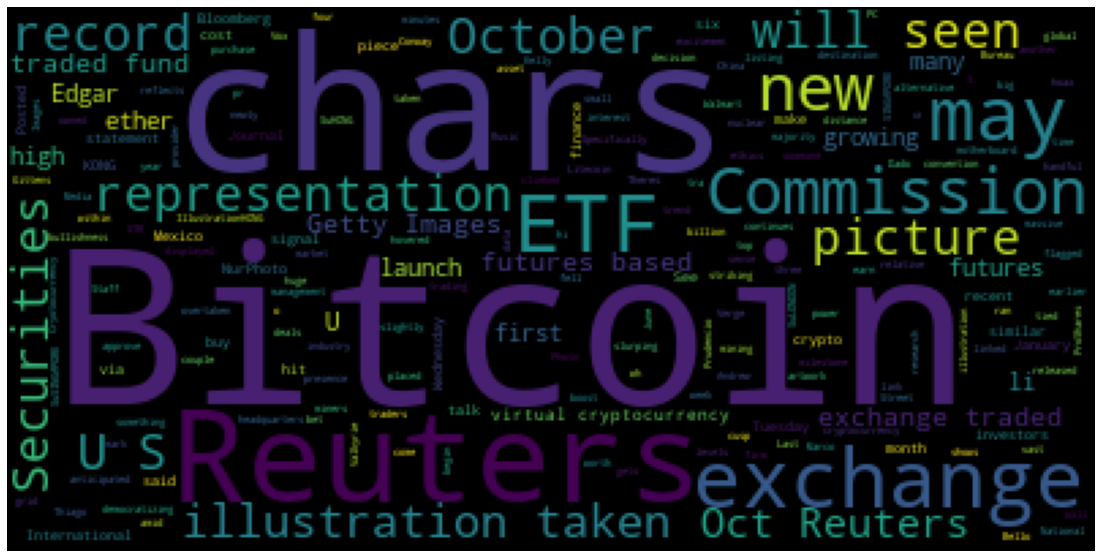

In [75]:
# Generate the Bitcoin word cloud
cloud_bit = WordCloud(background_color='black').generate(bitcoin_df.text.str.cat())
cloud_bit
plt.axis("off")
plt.imshow(cloud_bit)

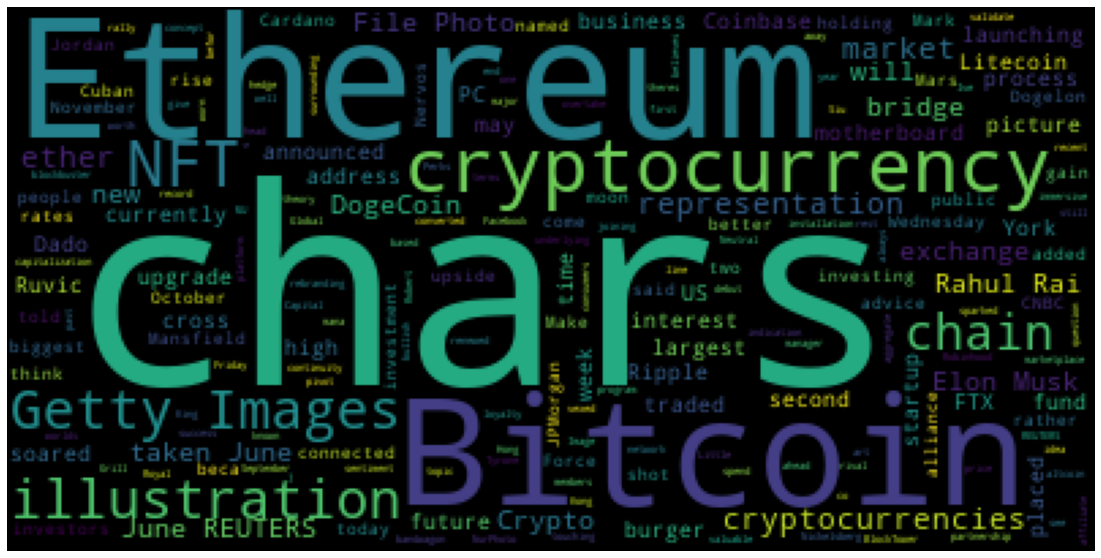

In [76]:
# Generate the Ethereum word cloud
cloud_eth = WordCloud(background_color='black').generate(ethereum_df.text.str.cat())
cloud_eth
plt.axis("off")
plt.imshow(cloud_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [77]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [78]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [79]:
# Concatenate all of the Bitcoin text together
all_bitcoin_text = bitcoin_df.text.str.cat()
all_bitcoin_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Specifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]Last week, the Wall Street Journal ran a piece on three recent nuclear-bitcoin deals that may signal a growing trend in the industry. The Journal piece reflects a small but growing sense of excitemen… [+9512 chars]For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs f

In [81]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_bitcoin_text)
bitcoin_doc
# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [82]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [83]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

earlier this year DATE
Walmart to Litecoin
 ORG
Verge ORG
Vox Media ORG
Photo Illustration PERSON
Thiago Prudencio/S ORG
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bloomberg GPE
the National Bureau ORG
Bitcoin PERSON
June 29, 2021 DATE
Dado Ruvic/IllustrationHONG KONG PERSON
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
Edgar SuLONDON PERSON
Reuters ORG
Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
Bitcoin PERSON
October 18, 2021 DATE
Edgar SuSINGAPORE PERSON
Reuters ORG
six-month DATE
Bitcoin PERSON
October 19, 2021 DATE
Reuters ORG
Bitcoin PERSON
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Reuters ORG
SINGAPORE PERSON
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares ORG
Marco Bello PERSON
Getty Images ORG
The Securitie

---

### Ethereum NER

In [84]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df.text.str.cat()
all_eth_text

'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars]Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars]Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars]Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana soared in

In [85]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)
eth_doc

# Add a title to the document
eth_doc.user_data["Title"] = "Ethereum NER"

In [86]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [87]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

Nervos  PERSON
today DATE
the Force Bridge FAC
Cuban NORP
CNBC ORG
Wednesday DATE
Bitcoin PERSON
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PERSON
0.00000229 MONEY
November 1 DATE
$0.0… MONEY
Getty Images PERSON
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
Ethereum ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Bitcoin, Ethereum ORG
Litecoin PERSON
June 29, 2021 DATE
Burger King ORG
Robinhood ORG
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum ORG
Bitcoin’s ORG
second ORDINAL
Thursday DATE
6:13 p.m. TIME
New York GPE
Ethereum ORG
0xef76 CARDINAL
0x8e39 CARDINAL
NFT ORG
Lionsgate/Miramax ORG
Quentin Tarantino's PERSON
1994 DATE
Pulp Fiction ORG
t

---